# Ryan Opoku's Covid-19 Dashboard

In [49]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd #Imports Panda's functionality to program, allows for visualisation of data. 
import numpy as np
import matplotlib.pyplot as plt #Data visulisation library
import datetime as dt
import json
from uk_covid19 import Cov19API  #After installing the SDK in environment, this code should run the COVID module.

In [50]:
#Allows for the embedding of matplotlib output
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

## Load initial data from disk

Loads data from the PHE API and then stores this information in JSON files. This program will compare Daily New Cases compared with Hospital Cases in the COVID-19 pandemic. 

In [51]:
# Filter function, which sets the area to Country and selects England. 
# ALl cases are based solely for England.
filters = [
    'areaType=nation',
    'areaName=England'
]


# Structure function based on the Public Health England metrics & variables. 
#This program will compare new cases with Hospital cases, 
#therefore new cases and hospital cases variables were required.
structure = {
    "date": "date",
    "NewCases": "newCasesByPublishDate",
    "HospitalCases": "hospitalCases"

}

#Code which access the COVID-19 PHE API
api = Cov19API(filters=filters, structure=structure)


#This code attempts to connect to the server using the API 
# and retrieves the responses in the form of a JSON. If there is no internet connectivity, requests will fail.
agedistribution=api.get_json() # Returns dictionary containing nested lists and dictionaries based on the ageddistribution.
print(agedistribution)


timeseries=api.get_json() # Returns dictionary containing nested lists and dictionaries based on the timeseries.
print(timeseries)
print(type(timeseries))

with open("timeseries.json", "wt") as OUTF:
    json.dump(timeseries, OUTF) #Writes data in JSON format, received from PHE to the timeseries.json file.
    
with open("agedistribution.json", "wt") as OUTF:
    json.dump(agedistribution, OUTF) #Writes data in JSON format, received from PHE to the agedistribution.json file.
    
with open("timeseries.json", "rt") as INFILE:
    data=json.load(INFILE) #Reads and loads the new data found in the timeseries.json file.
    
data

{'data': [{'date': '2021-12-08', 'NewCases': 44019, 'HospitalCases': 6053}, {'date': '2021-12-07', 'NewCases': 38866, 'HospitalCases': 6027}, {'date': '2021-12-06', 'NewCases': 41525, 'HospitalCases': 5992}, {'date': '2021-12-05', 'NewCases': 37396, 'HospitalCases': 5903}, {'date': '2021-12-04', 'NewCases': 39949, 'HospitalCases': 5784}, {'date': '2021-12-03', 'NewCases': 43888, 'HospitalCases': 5851}, {'date': '2021-12-02', 'NewCases': 45880, 'HospitalCases': 5915}, {'date': '2021-12-01', 'NewCases': 41519, 'HospitalCases': 5829}, {'date': '2021-11-30', 'NewCases': 33590, 'HospitalCases': 6123}, {'date': '2021-11-29', 'NewCases': 34906, 'HospitalCases': 6094}, {'date': '2021-11-28', 'NewCases': 32136, 'HospitalCases': 5890}, {'date': '2021-11-27', 'NewCases': 35798, 'HospitalCases': 5852}, {'date': '2021-11-26', 'NewCases': 42272, 'HospitalCases': 5992}, {'date': '2021-11-25', 'NewCases': 40382, 'HospitalCases': 6068}, {'date': '2021-11-24', 'NewCases': 36511, 'HospitalCases': 6062}, 

{'data': [{'date': '2021-12-08', 'NewCases': 44019, 'HospitalCases': 6053},
  {'date': '2021-12-07', 'NewCases': 38866, 'HospitalCases': 6027},
  {'date': '2021-12-06', 'NewCases': 41525, 'HospitalCases': 5992},
  {'date': '2021-12-05', 'NewCases': 37396, 'HospitalCases': 5903},
  {'date': '2021-12-04', 'NewCases': 39949, 'HospitalCases': 5784},
  {'date': '2021-12-03', 'NewCases': 43888, 'HospitalCases': 5851},
  {'date': '2021-12-02', 'NewCases': 45880, 'HospitalCases': 5915},
  {'date': '2021-12-01', 'NewCases': 41519, 'HospitalCases': 5829},
  {'date': '2021-11-30', 'NewCases': 33590, 'HospitalCases': 6123},
  {'date': '2021-11-29', 'NewCases': 34906, 'HospitalCases': 6094},
  {'date': '2021-11-28', 'NewCases': 32136, 'HospitalCases': 5890},
  {'date': '2021-11-27', 'NewCases': 35798, 'HospitalCases': 5852},
  {'date': '2021-11-26', 'NewCases': 42272, 'HospitalCases': 5992},
  {'date': '2021-11-25', 'NewCases': 40382, 'HospitalCases': 6068},
  {'date': '2021-11-24', 'NewCases': 365

## Wrangle the data
Code functionality that wrangles data and begins to plot this data in the form of a bar graph.

2020-01-31 00:00:00  to  2021-12-08 00:00:00


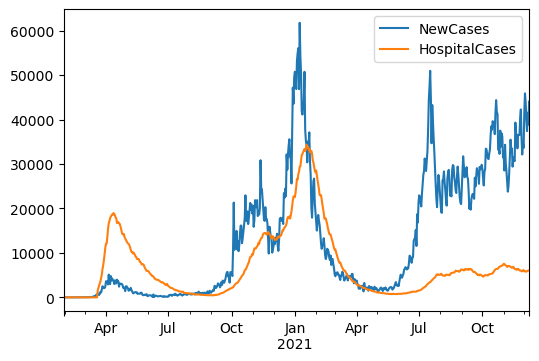

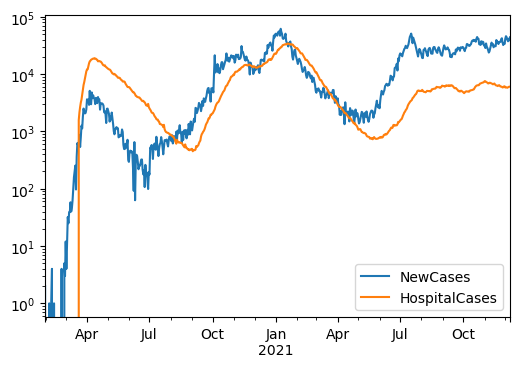

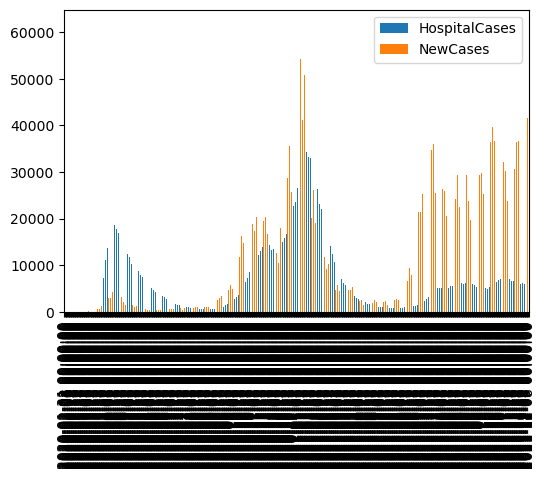

In [52]:
#Data wrangling aspect of the code. Allows for date values to form part of the x-axis.
datalist=data['data']
datalist

dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
dates

#Converts dates into a valid format that is compatible with the pandas module.
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)

#Creates an index based on the dates. Based on the two parameters of NewCases and HospitalCases.
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['NewCases', 'HospitalCases'])
timeseriesdf

for entry in datalist: # each entry is a dictionary with new cases and hospital cases.
    date=parse_date(entry['date'])
    for column in ['NewCases', 'HospitalCases']:
        # check that it is empty and that there are no duplications.
        if pd.isna(timeseriesdf.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0
            timeseriesdf.loc[date, column]=value
            
# fills in any remaining "holes" due to missing dates for example.
timeseriesdf.fillna(0.0, inplace=True)
            
timeseriesdf
#Creates a basic plot based on the data from the JSON, consisting of Daily New cases and Hospital cases.
timeseriesdf.plot() 
timeseriesdf.plot(logy=True)

datadic=data['data'][0] # data['data'] is a list
datadic

#Both parameters will be called and plotted on the bar graph.
HospitalCases=datadic['HospitalCases']
NewCases=datadic['NewCases']
HospitalCases
NewCases

timeseriesdf.plot(kind='bar', y=['HospitalCases','NewCases']) #Plots the daily hospital cases and new cases on a graph.

# Saves to a pickle file
timeseriesdf.to_pickle("timeseriesdf.pkl")

## Download current data

In [53]:
#Code that allows for up to date data to be download from PHE by pressing the Update Data button.
def access_api(button):
    apibutton.icon="check"
    apibutton.disabled=True
    
apibutton=wdg.Button(
    description='Update data', #Message that is shown inside the button.
    disabled=False,
    button_style='', 
    tooltip='Click to download the latest current daily Public Health England data',
    icon='download' # Once a user hovers over the button, this message is shown as a guide to users.
)

#Registers the callback function with the button and vice versa.
apibutton.on_click(access_api)

display(apibutton)

Button(description='Update data', icon='download', style=ButtonStyle(), tooltip='Click to download the latest …

## Graphs and Analysis

Shows the data wrangled from the PHE data in the form of graphs

In [54]:
#Adds interactivity to graph, allows a user to see only hospital cases, new cases or both combined!
#In a linear scale, or log format.
series=wdg.SelectMultiple(
    options=['NewCases', 'HospitalCases'], #Two options based on the graph and data.
    value=['NewCases', 'HospitalCases'], #User can either select new cases, or hospital cases.
    rows=2,
    description='View',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
    description='Scale:',
    disabled=False
)


controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() #Allows for graphs to update and show latest data. Won't update if this code is missing.
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")


graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)


Output()

**Author and Copyright Notice** 2021, Ryan Opoku  *Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england).*